In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("online_classroom_data.csv", decimal='.')

In [3]:
df2=pd.read_csv("online_classroom_data.csv", decimal=',')

# The dataset contains student skill evaluations and the number of reactions received to their posts in e-learning platform, and the main question is to find a link between the reactions and the students' skill levels.

In [4]:
a=[]
for i in range(1,6):
    df1[f"Characteristic_{i}"]= df2[f"sk{i}_classroom"]
    df1.drop(columns=[f"sk{i}_classroom"],axis=0, inplace=True)
    a.append(df1[f"Characteristic_{i}"].mean())
    


In [5]:
a

[5.246478873239437,
 5.07887323943662,
 5.445070422535212,
 6.8788732394366185,
 4.788732394366197]

In [6]:
df1.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,Approved,Characteristic_1,Characteristic_2,Characteristic_3,Characteristic_4,Characteristic_5
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,0,2.1,2.4,3.6,1.7,3.5
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,0,0.3,0.3,0.1,0.2,0.0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,1,8.0,5.0,7.0,5.0,5.0
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,1,6.0,5.0,6.0,4.0,4.0
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,1,8.7,9.0,10.0,8.8,6.5


In [7]:
df1.describe()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,Approved,Characteristic_1,Characteristic_2,Characteristic_3,Characteristic_4,Characteristic_5
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,35.000000,5.507042,4.028169,7.478873,11.366197,0.549296,18.309859,0.056338,18.957746,10279.126761,0.704225,5.246479,5.078873,5.445070,6.878873,4.788732
std,20.639767,6.480461,6.843082,12.746831,13.970622,1.350013,21.930795,0.287219,22.086477,10176.243372,0.459639,3.324190,3.273396,3.564459,3.856198,3.448252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,2.000000,0.000000,0.000000,1.500000,0.000000,6.500000,0.000000,7.000000,1627.500000,0.000000,2.150000,2.050000,1.150000,4.500000,0.500000
50%,35.000000,4.000000,3.000000,2.000000,7.000000,0.000000,14.000000,0.000000,16.000000,7664.000000,1.000000,6.000000,5.700000,6.700000,8.700000,5.000000
75%,52.500000,7.500000,5.500000,12.500000,16.000000,0.000000,24.000000,0.000000,25.500000,16574.000000,1.000000,8.000000,8.000000,8.000000,9.600000,8.000000
max,70.000000,46.000000,53.000000,90.000000,89.000000,7.000000,150.000000,2.000000,155.000000,43612.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [8]:
df1.isna().sum()

Unnamed: 0            0
total_posts           0
helpful_post          0
nice_code_post        0
collaborative_post    0
confused_post         0
creative_post         0
bad_post              0
amazing_post          0
timeonline            0
Approved              0
Characteristic_1      0
Characteristic_2      0
Characteristic_3      0
Characteristic_4      0
Characteristic_5      0
dtype: int64

In [9]:
df1.dtypes

Unnamed: 0              int64
total_posts           float64
helpful_post          float64
nice_code_post        float64
collaborative_post    float64
confused_post         float64
creative_post         float64
bad_post              float64
amazing_post          float64
timeonline            float64
Approved                int64
Characteristic_1      float64
Characteristic_2      float64
Characteristic_3      float64
Characteristic_4      float64
Characteristic_5      float64
dtype: object

# Below we can see the barplot of all 71 students' verification status in e-learning platform

###  Complementary colors were chosen to represent Approved/Not Approved users in the below Barplot , as the colors  are opposite to each other on the color wheel , the contrast makes it easier for the viewer to distinguish between the bars





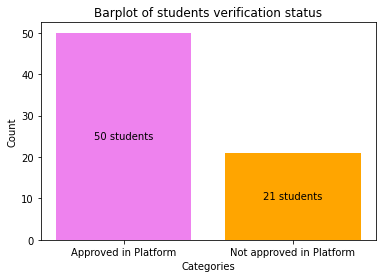

In [10]:
category_approved = df1["Approved"].sum()
category_not_approved = df1["Approved"].count()-df1["Approved"].sum()

# Plotting
plt.bar(["Approved in Platform", "Not approved in Platform"], [category_approved, category_not_approved], color=["violet", "orange"])
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title("Barplot of students verification status")
plt.text(0, category_approved/2, f"{category_approved} students", ha="center", va="center", color="black")
plt.text(1, category_not_approved/2, f"{category_not_approved} students", ha="center", va="center", color="black")
plt.show()

# Total posts for different buckets of time spent online

### In the below graph no specific color was set, and as default the barplot was given  a clockwise full color effect stretching form red/orange back to violin/red

### Which gives a smooth differentiating effect to the "timeonline" variable

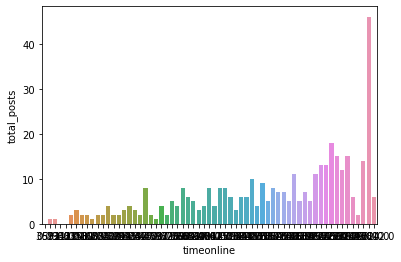

In [11]:
ax = sns.barplot(y=df1["total_posts"], x= df1["timeonline"], )


# Below we plot histograms for all skill ratings with their appropriate mean value desplayed as vertical dashed line

### As every histogram describes a unique variable,  color distinction may be inappropriate,
### Thus no color preference is given/set in below histograms

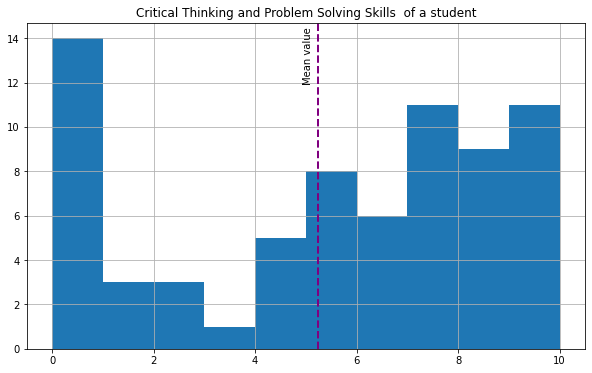

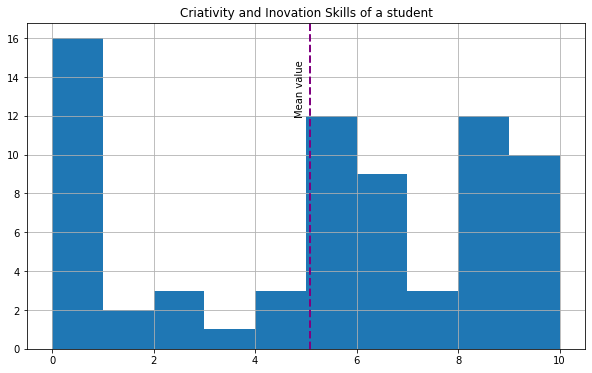

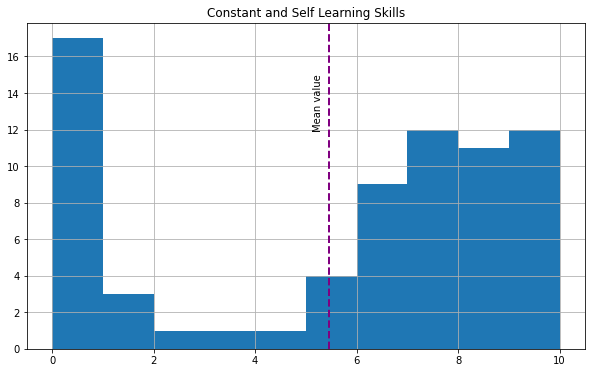

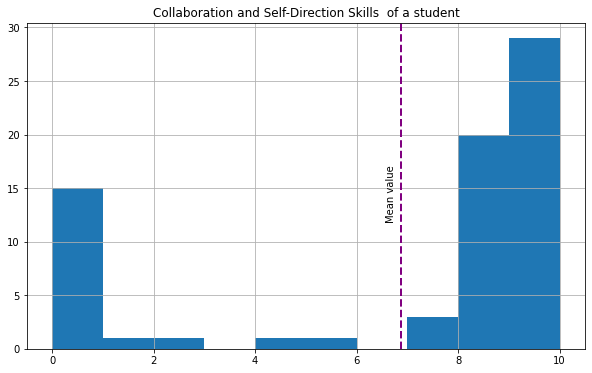

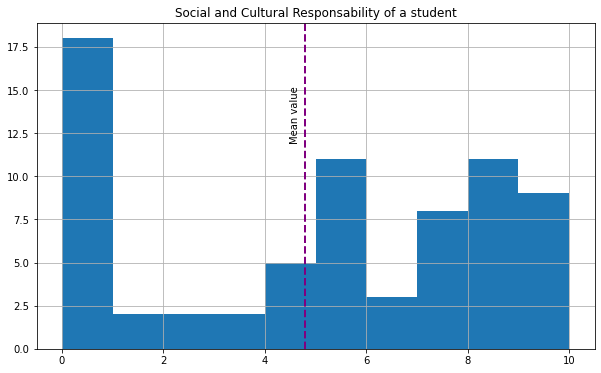

In [12]:
desc=["Critical Thinking and Problem Solving Skills  of a student","Criativity and Inovation Skills of a student","Constant and Self Learning Skills","Collaboration and Self-Direction Skills  of a student",
  "Social and Cultural Responsability of a student"]
for i in range(1,6):
    charact = df1.filter(regex=f'^Characteristic_{i}')

    # plot histograms for each column
    charact.hist(figsize=(10,6), bins=10)
    plt.axvline(a[i-1], color='purple', linestyle='dashed', linewidth=2)
    plt.text(a[i-1]-0.3,12,'Mean value',rotation=90)
    plt.title(f"{desc[i-1]}")
    plt.show()

# We may also plot the histograms with their density approximation

### In the below plot we once more plot certain histogram plots with their density approximation for every unique variable
### Thus to avoid differentiating any specific variable , no color setup was used

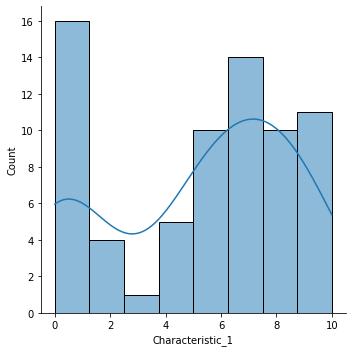

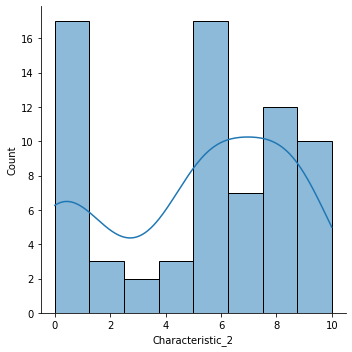

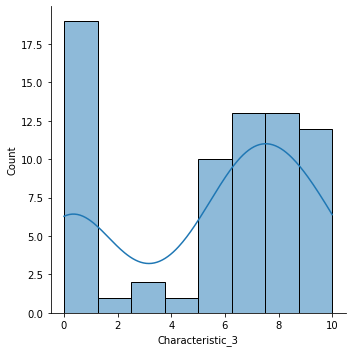

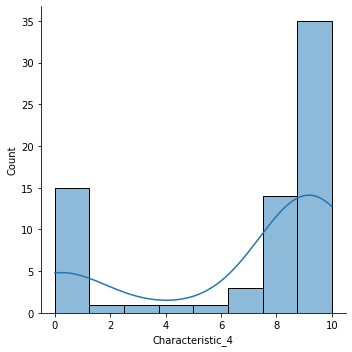

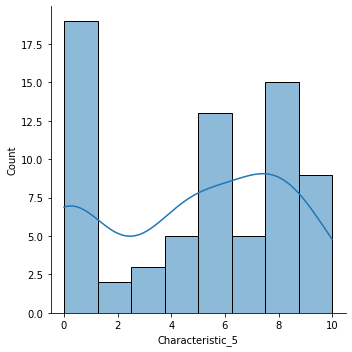

In [13]:
for i in range(1,6):
    sns.displot(df1[f"Characteristic_{i}"], kde=True, )
    plt.show()

# Boxplots for different reactions' intensities students received for their posts

### The 8 variables were not differentiated in color as the "Number of reactions" descrite variable already does the differentiation for all the 8 variables for which boxplots are plotted 

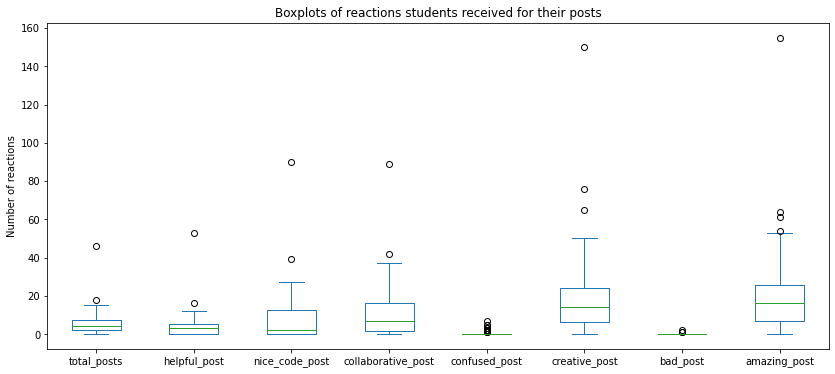

In [14]:
reactions=["total_posts","helpful_post","nice_code_post","collaborative_post",
 "confused_post","creative_post","bad_post","amazing_post"]
df2= df1[reactions]
fig, ax = plt.subplots(figsize=(14, 6))

props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkBlue", caps="Gray")
df2.plot.box(ax=ax,)
ax.set_title("Boxplots of reactions students received for their posts")
ax.set_ylabel("Number of reactions")




plt.show()


In [15]:
Q3 = np.quantile(df2, 0.75, axis=0)
Q1 = np.quantile(df2, 0.25, axis=0)
IQR = Q3 - Q1

In [16]:
IQR

array([ 5.5,  5.5, 12.5, 14.5,  0. , 17.5,  0. , 18.5])

# Below we try to identify students  who have reactions out of 2*SD range

In [17]:
outlier_threshold = 2

# Calculate mean and standard deviation for each column
mean = df2.mean()
std = df2.std()

# Identify outlier indexes for each column
outliers = ((df2 - mean).abs() > outlier_threshold *std).any(axis=1)
outlier_indexes = df2.index[outliers]


In [18]:
outliers.sum()

10

In [19]:
outlier_threshold *std

total_posts           12.960923
helpful_post          13.686163
nice_code_post        25.493661
collaborative_post    27.941243
confused_post          2.700026
creative_post         43.861590
bad_post               0.574439
amazing_post          44.172954
dtype: float64

In [20]:
out=df2[outliers]
out

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post
2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0
5,9.0,3.0,9.0,16.0,7.0,21.0,0.0,17.0
19,18.0,16.0,27.0,42.0,3.0,76.0,2.0,54.0
23,15.0,8.0,8.0,29.0,0.0,65.0,0.0,61.0
33,12.0,7.0,11.0,37.0,0.0,34.0,0.0,64.0
45,8.0,6.0,15.0,13.0,3.0,12.0,1.0,18.0
58,5.0,5.0,0.0,12.0,5.0,11.0,0.0,12.0
61,11.0,12.0,39.0,22.0,2.0,45.0,0.0,28.0
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0
67,6.0,5.0,14.0,16.0,5.0,24.0,0.0,22.0


In [21]:
print(out.index)

Int64Index([2, 5, 19, 23, 33, 45, 58, 61, 66, 67], dtype='int64')


In [22]:
df_outliers=df1.loc[df1.index[out.index]]

In [23]:
df_outliers

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,Approved,Characteristic_1,Characteristic_2,Characteristic_3,Characteristic_4,Characteristic_5
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,1,8.0,5.0,7.0,5.0,5.0
5,5,9.0,3.0,9.0,16.0,7.0,21.0,0.0,17.0,14985.0,1,5.1,6.0,7.5,8.6,5.0
19,19,18.0,16.0,27.0,42.0,3.0,76.0,2.0,54.0,21506.0,1,9.0,9.0,9.3,8.6,9.0
23,23,15.0,8.0,8.0,29.0,0.0,65.0,0.0,61.0,22594.0,1,10.0,9.0,8.0,10.0,8.0
33,33,12.0,7.0,11.0,37.0,0.0,34.0,0.0,64.0,22701.0,1,8.0,8.0,7.0,9.0,8.0
45,45,8.0,6.0,15.0,13.0,3.0,12.0,1.0,18.0,15354.0,1,6.0,4.9,6.7,7.0,3.5
58,58,5.0,5.0,0.0,12.0,5.0,11.0,0.0,12.0,18545.0,1,4.8,5.4,7.3,9.4,5.0
61,61,11.0,12.0,39.0,22.0,2.0,45.0,0.0,28.0,18955.0,1,6.3,5.7,8.0,7.0,4.5
66,66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0,1,10.0,10.0,10.0,10.0,8.0
67,67,6.0,5.0,14.0,16.0,5.0,24.0,0.0,22.0,13221.0,1,6.7,6.7,8.3,9.4,4.0


# We may create correlation heatmaps for both initial data, and the data of students who had out of range reactions on thair posts

### Below default colors give differentiating effect scaling from  green to blue, with sharpness effect highlighting the more severe relationships

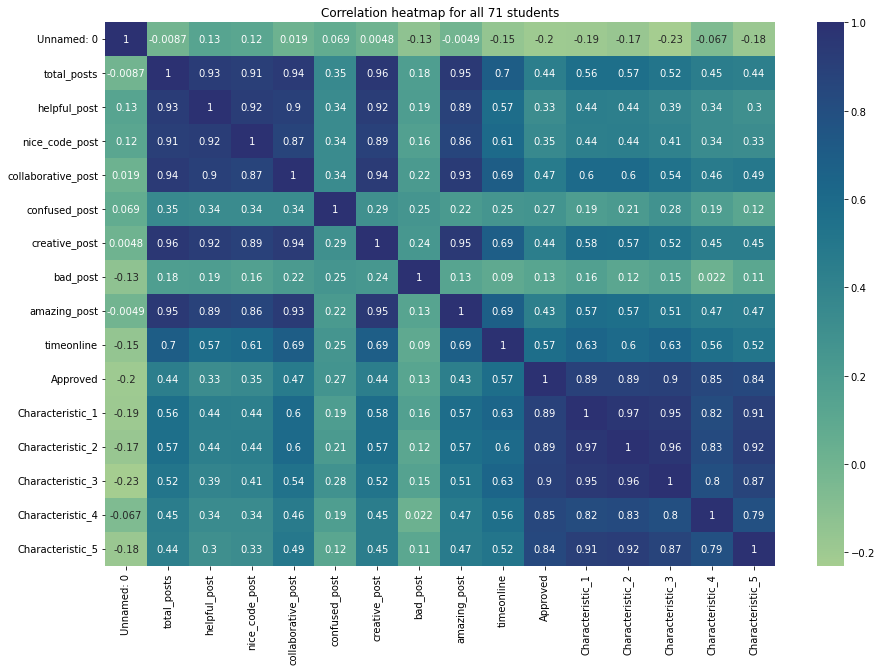

In [24]:
plt.figure(figsize=(15,10))
ax=sns.heatmap(df1.corr(), annot=True,cmap="crest" )
ax.set_title("Correlation heatmap for all 71 students")
plt.show()

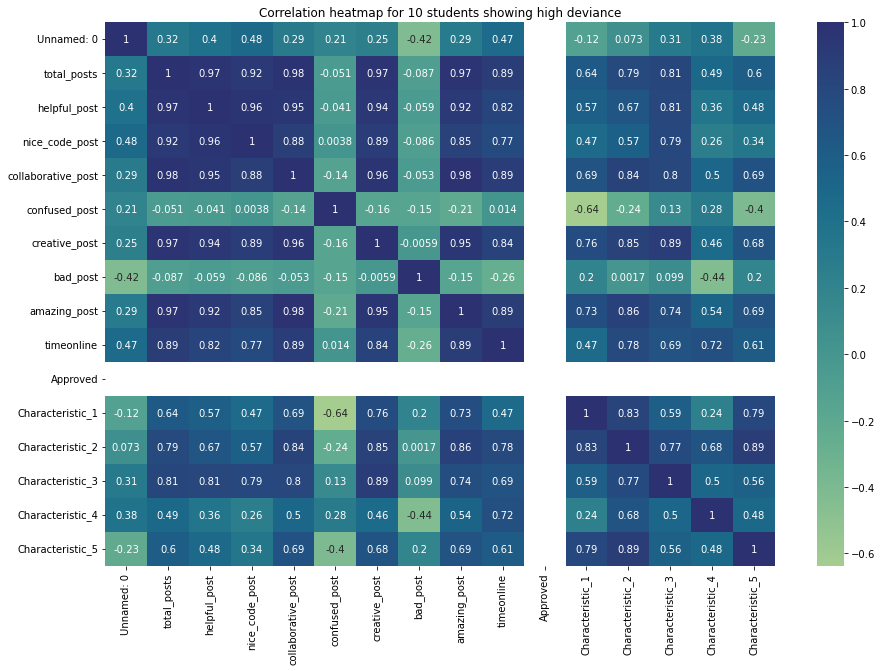

In [25]:
plt.figure(figsize=(15,10))
ax1=sns.heatmap(df_outliers.corr(), annot=True,cmap="crest" )
ax1.set_title("Correlation heatmap for 10 students showing high deviance")
plt.show()

# We may track high(>0.7 or<-0.7) correlation pairs s 
# [Critical Thinking and Problem Solving Skills  of a student and Creative post],
# [Criativity and Inovation Skills of a student and Collaborative_post , Creative_post, and Amazing_post ],
# [Constant and Self Learning Skills and Collaborative_post ,  Creative_post],
# [Collaboration and Self-Direction Skills and timeonline] }